In [1]:
import ensaio
import xarray as xr

fname = ensaio.fetch_lightning_creek_magnetic(version=1)
magnetic_grid = xr.load_dataarray(fname)
magnetic_grid

<xarray.DataArray 'total_field_anomaly' (northing: 370, easting: 346)> Size: 1MB
array([[  34.99995117,   36.19995117,   36.69995117, ..., -101.10004883,
        -100.40004883,  -99.60004883],
       [  36.49995117,   37.59995117,   37.99995117, ..., -102.20004883,
        -101.50004883, -100.70004883],
       [  37.09995117,   38.19995117,   38.59995117, ..., -103.30004883,
        -102.60004883, -101.90004883],
       ...,
       [ 182.79995117,  172.39995117,  160.79995117, ...,    0.79995117,
         -24.20004883,  -41.80004883],
       [ 182.09995117,  172.59995117,  161.39995117, ...,    5.99995117,
         -21.50004883,  -41.00004883],
       [ 178.79995117,  170.39995117,  160.29995117, ...,   11.39995117,
         -16.00004883,  -35.80004883]], shape=(370, 346))
Coordinates:
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05
    height    (northing, easting) float64 1MB 500.0 500.0 500.0 ... 500.0 500.0
Attributes:
    Conventions:   CF-1.8
    title:         Magnetic total-field anomaly of the Lightning Creek sill c...
    crs:           proj=utm zone=54 south datum=WGS84 units=m no_defs ellps=W...
    source:        Interpolated from airborne magnetic line data using gradie...
    license:       Creative Commons Attribution 4.0 International Licence
    references:    Geophysical Acquisition & Processing Section 2019. MIM Dat...
    long_name:     total-field magnetic anomaly
    units:         nT
    actual_range:  [-1785.  3798.]

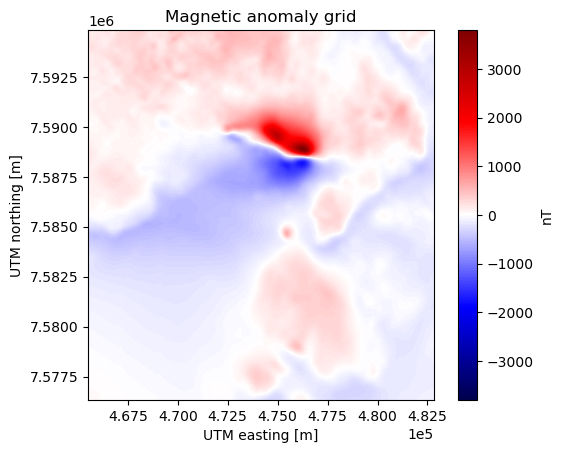

In [2]:
import matplotlib.pyplot as plt

tmp = magnetic_grid.plot(cmap="seismic", center=0, add_colorbar=False)
plt.gca().set_aspect("equal")
plt.title("Magnetic anomaly grid")
plt.gca().ticklabel_format(style="sci", scilimits=(0, 0))
plt.colorbar(tmp, label="nT")
plt.show()

In [3]:
pad_width = {
    "easting": magnetic_grid.easting.size // 3,
    "northing": magnetic_grid.northing.size // 3,
}

In [4]:
import xrft

magnetic_grid_no_height = magnetic_grid.drop_vars("height")
magnetic_grid_padded = xrft.pad(magnetic_grid_no_height, pad_width)
magnetic_grid_padded

<xarray.DataArray 'total_field_anomaly' (northing: 616, easting: 576)> Size: 3MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(616, 576))
Coordinates:
  * northing  (northing) float64 5kB 7.57e+06 7.57e+06 ... 7.601e+06 7.601e+06
  * easting   (easting) float64 5kB 4.598e+05 4.598e+05 ... 4.885e+05 4.885e+05
Attributes:
    Conventions:   CF-1.8
    title:         Magnetic total-field anomaly of the Lightning Creek sill c...
    crs:           proj=utm zone=54 south datum=WGS84 units=m no_defs ellps=W...
    source:        Interpolated from airborne magnetic line data using gradie...
    license:       Creative Commons Attribution 4.0 International Licence
    references:    Geophysical Acquisition & Processing Section 2019. MIM Dat...
    long_name:     total-field magnetic anomaly
    units:         nT
    actual_range:  [-1785.  3798.]

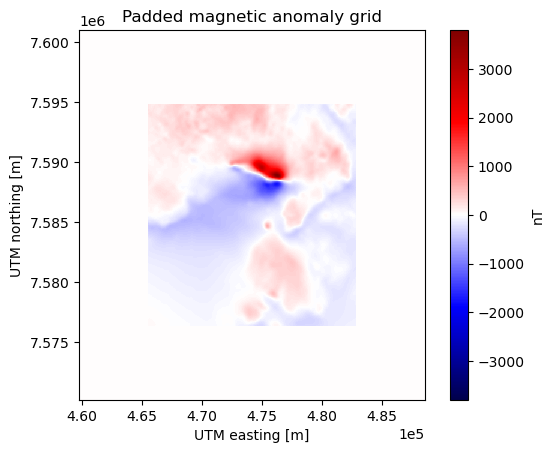

In [5]:
tmp = magnetic_grid_padded.plot(cmap="seismic", center=0, add_colorbar=False)
plt.gca().set_aspect("equal")
plt.title("Padded magnetic anomaly grid")
plt.gca().ticklabel_format(style="sci", scilimits=(0, 0))
plt.colorbar(tmp, label="nT")
plt.show()

In [6]:
import harmonica as hm

deriv_upward = hm.derivative_upward(magnetic_grid_padded)
deriv_upward

/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/harmonica/filters/_fft.py:48: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  grid = grid.drop(bad_coords)
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:455: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  daft = daft.drop([d for d in dim if d in daft.coords])
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:671: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da = da.drop([d for d in dim if d in da.coords])


<xarray.DataArray (northing: 616, easting: 576)> Size: 3MB
array([[-1.33181514e-05, -9.52547848e-06, -5.67287091e-06, ...,
        -2.43410150e-05, -2.07254007e-05, -1.70512251e-05],
       [-2.61443879e-05, -2.24106086e-05, -1.86195889e-05, ...,
        -3.70081237e-05, -3.34426463e-05, -2.98216205e-05],
       [-3.90061848e-05, -3.53298512e-05, -3.15993283e-05, ...,
        -4.97144108e-05, -4.61979657e-05, -4.26286722e-05],
       ...,
       [ 2.49528968e-05,  2.89296170e-05,  3.29751971e-05, ...,
         1.34293348e-05,  1.72033026e-05,  2.10442358e-05],
       [ 1.22299968e-05,  1.61441417e-05,  2.01240010e-05, ...,
         8.77265689e-07,  4.59710171e-06,  8.38123474e-06],
       [-5.26789593e-07,  3.32586838e-06,  7.24155673e-06, ...,
        -1.17127613e-05, -8.04558340e-06, -4.31716223e-06]],
      shape=(616, 576))
Coordinates:
  * northing  (northing) float64 5kB 7.57e+06 7.57e+06 ... 7.601e+06 7.601e+06
  * easting   (easting) float64 5kB 4.598e+05 4.598e+05 ... 4.885e+05 4.885e+05

In [7]:
deriv_upward = xrft.unpad(deriv_upward, pad_width)
deriv_upward

<xarray.DataArray (northing: 370, easting: 346)> Size: 1MB
array([[-0.95819615, -0.62479717, -0.65249412, ...,  1.73446398,
         1.6766403 ,  2.72435657],
       [-0.63634012, -0.21904971, -0.23107569, ...,  0.49049566,
         0.45948428,  1.68409986],
       [-0.66359177, -0.2353631 , -0.24506233, ...,  0.51034737,
         0.49225437,  1.75482676],
       ...,
       [-3.39466133, -0.92997513, -0.84908229, ...,  0.187395  ,
         0.37947101,  1.13012071],
       [-3.28895188, -0.89679122, -0.84612101, ...,  0.15550382,
         0.36489592,  1.12153698],
       [-5.04820203, -2.9126185 , -2.80733457, ..., -0.11714694,
         0.3870613 ,  1.26040208]], shape=(370, 346))
Coordinates:
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05

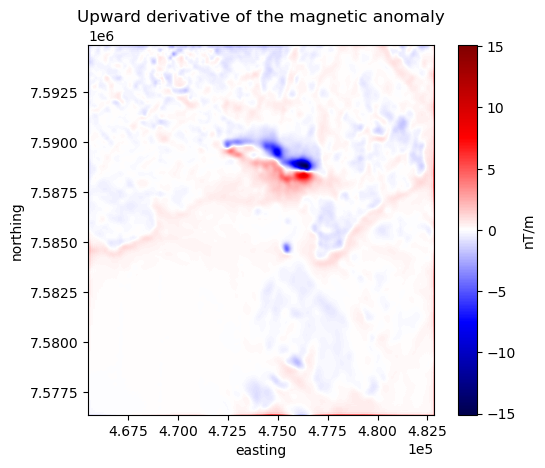

In [8]:
tmp = deriv_upward.plot(cmap="seismic", center=0, add_colorbar=False)
plt.gca().set_aspect("equal")
plt.title("Upward derivative of the magnetic anomaly")
plt.gca().ticklabel_format(style="sci", scilimits=(0, 0))
plt.colorbar(tmp, label="nT/m")
plt.show()

In [9]:
deriv_easting = hm.derivative_easting(magnetic_grid)
deriv_easting

<xarray.DataArray 'total_field_anomaly' (northing: 370, easting: 346)> Size: 1MB
array([[ 0.024,  0.017,  0.004, ...,  0.016,  0.015,  0.016],
       [ 0.022,  0.015,  0.004, ...,  0.015,  0.015,  0.016],
       [ 0.022,  0.015,  0.003, ...,  0.015,  0.014,  0.014],
       ...,
       [-0.208, -0.22 , -0.221, ..., -0.553, -0.426, -0.352],
       [-0.19 , -0.207, -0.218, ..., -0.602, -0.47 , -0.39 ],
       [-0.168, -0.185, -0.2  , ..., -0.597, -0.472, -0.396]],
      shape=(370, 346))
Coordinates:
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05
    height    (northing, easting) float64 1MB 500.0 500.0 500.0 ... 500.0 500.0

In [10]:
deriv_northing = hm.derivative_northing(magnetic_grid)
deriv_northing

<xarray.DataArray 'total_field_anomaly' (northing: 370, easting: 346)> Size: 1MB
array([[ 0.03 ,  0.028,  0.026, ..., -0.022, -0.022, -0.022],
       [ 0.021,  0.02 ,  0.019, ..., -0.022, -0.022, -0.023],
       [ 0.006,  0.005,  0.005, ..., -0.023, -0.024, -0.025],
       ...,
       [-0.002,  0.014,  0.022, ...,  0.103,  0.036, -0.015],
       [-0.04 , -0.02 , -0.005, ...,  0.106,  0.082,  0.06 ],
       [-0.066, -0.044, -0.022, ...,  0.108,  0.11 ,  0.104]],
      shape=(370, 346))
Coordinates:
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05
    height    (northing, easting) float64 1MB 500.0 500.0 500.0 ... 500.0 500.0

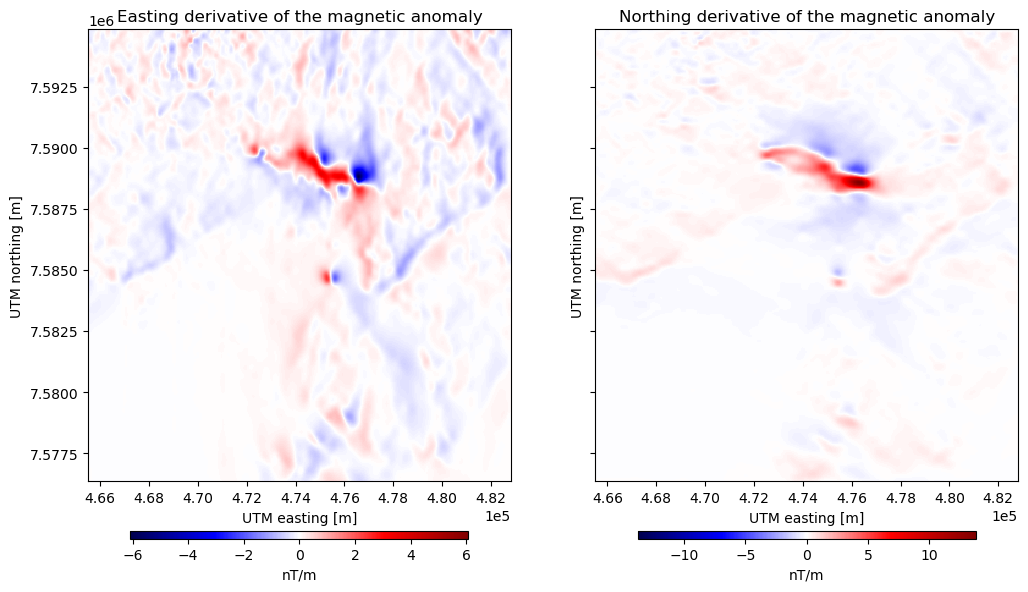

In [11]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, sharey=True, figsize=(12, 8)
)

cbar_kwargs=dict(
    label="nT/m", orientation="horizontal", shrink=0.8, pad=0.08, aspect=42
)
kwargs = dict(center=0, cmap="seismic", cbar_kwargs=cbar_kwargs)

tmp = deriv_easting.plot(ax=ax1, **kwargs)
tmp = deriv_northing.plot(ax=ax2, **kwargs)

ax1.set_title("Easting derivative of the magnetic anomaly")
ax2.set_title("Northing derivative of the magnetic anomaly")
for ax in (ax1, ax2):
    ax.set_aspect("equal")
    ax.ticklabel_format(style="sci", scilimits=(0, 0))
plt.show()

In [12]:
deriv_easting = hm.derivative_easting(magnetic_grid_padded, method="fft")
deriv_easting = xrft.unpad(deriv_easting, pad_width)
deriv_easting

/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/harmonica/filters/_fft.py:48: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  grid = grid.drop(bad_coords)
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:455: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  daft = daft.drop([d for d in dim if d in daft.coords])
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:671: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da = da.drop([d for d in dim if d in da.coords])


<xarray.DataArray (northing: 370, easting: 346)> Size: 1MB
array([[ 0.50048199, -0.19278044,  0.13577175, ...,  0.39878843,
        -0.59429549,  1.39003591],
       [ 0.52115484, -0.20585468,  0.14315899, ...,  0.40289984,
        -0.60133441,  1.40562168],
       [ 0.52891822, -0.2086157 ,  0.14348528, ...,  0.40827692,
        -0.61014988,  1.42089306],
       ...,
       [ 2.43620373, -1.38416908,  0.49946553, ..., -0.3666967 ,
        -0.73927385,  0.42750644],
       [ 2.43711512, -1.36261715,  0.49770439, ..., -0.41819735,
        -0.78503278,  0.39910955],
       [ 2.40158711, -1.31498061,  0.50162999, ..., -0.43062165,
        -0.75785869,  0.32352971]], shape=(370, 346))
Coordinates:
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05

In [13]:
deriv_northing = hm.derivative_northing(magnetic_grid_padded, method="fft")
deriv_northing = xrft.unpad(deriv_northing, pad_width)
deriv_northing

/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/harmonica/filters/_fft.py:48: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  grid = grid.drop(bad_coords)
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:455: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  daft = daft.drop([d for d in dim if d in daft.coords])
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:671: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da = da.drop([d for d in dim if d in da.coords])


<xarray.DataArray (northing: 370, easting: 346)> Size: 1MB
array([[ 0.49981797,  0.51505152,  0.52085958, ..., -1.41297184,
        -1.40373407, -1.39047857],
       [-0.18344079, -0.19204679, -0.19683759, ...,  0.59467933,
         0.5912331 ,  0.58320314],
       [ 0.1326666 ,  0.13715404,  0.14021738, ..., -0.41085833,
        -0.41006472, -0.40635804],
       ...,
       [-0.67325073, -0.62931925, -0.587516  , ...,  0.04336853,
         0.07440956,  0.09627221],
       [ 1.03876541,  1.01294743,  0.97022434, ...,  0.19944866,
         0.01274978, -0.12811109],
       [-2.51808837, -2.39082378, -2.23712997, ..., -0.10561023,
         0.28247463,  0.55809873]], shape=(370, 346))
Coordinates:
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05

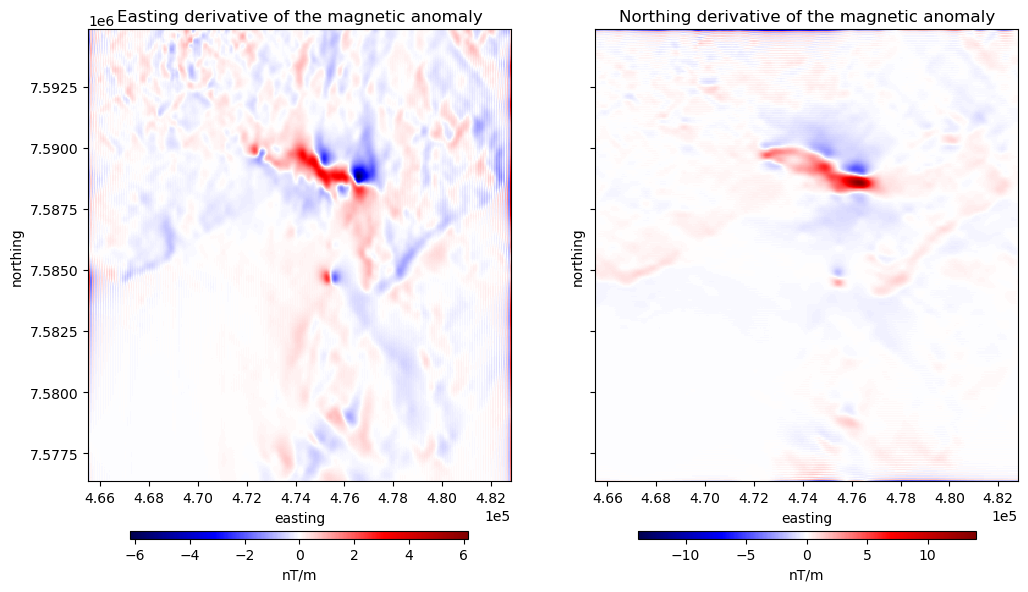

In [14]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, sharey=True, figsize=(12, 8)
)

cbar_kwargs=dict(
    label="nT/m", orientation="horizontal", shrink=0.8, pad=0.08, aspect=42
)
kwargs = dict(center=0, cmap="seismic", cbar_kwargs=cbar_kwargs)

tmp = deriv_easting.plot(ax=ax1, **kwargs)
tmp = deriv_northing.plot(ax=ax2, **kwargs)

ax1.set_title("Easting derivative of the magnetic anomaly")
ax2.set_title("Northing derivative of the magnetic anomaly")
for ax in (ax1, ax2):
    ax.set_aspect("equal")
    ax.ticklabel_format(style="sci", scilimits=(0, 0))
plt.show()

In [15]:
upward_continued = hm.upward_continuation(
    magnetic_grid_padded, height_displacement=500
)

/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/harmonica/filters/_fft.py:48: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  grid = grid.drop(bad_coords)
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:455: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  daft = daft.drop([d for d in dim if d in daft.coords])
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:671: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da = da.drop([d for d in dim if d in da.coords])


In [16]:
upward_continued = xrft.unpad(upward_continued, pad_width)
upward_continued

<xarray.DataArray (northing: 370, easting: 346)> Size: 1MB
array([[  1.53187928,   1.85099564,   2.13678808, ..., -33.6048979 ,
        -31.65891672, -29.67750887],
       [  1.82032573,   2.17483923,   2.49235855, ..., -35.9639625 ,
        -33.83599574, -31.66680075],
       [  2.07316733,   2.45926837,   2.80498407, ..., -38.27996857,
        -35.97492957, -33.62308159],
       ...,
       [ 50.44855928,  53.84377734,  57.13891805, ...,   4.05301094,
          2.81272119,   1.76442772],
       [ 47.56513259,  50.69950849,  53.74613485, ...,   4.6684348 ,
          3.44419849,   2.39520294],
       [ 44.63682346,  47.50470212,  50.29751413, ...,   5.03755398,
          3.86191533,   2.84250143]], shape=(370, 346))
Coordinates:
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05

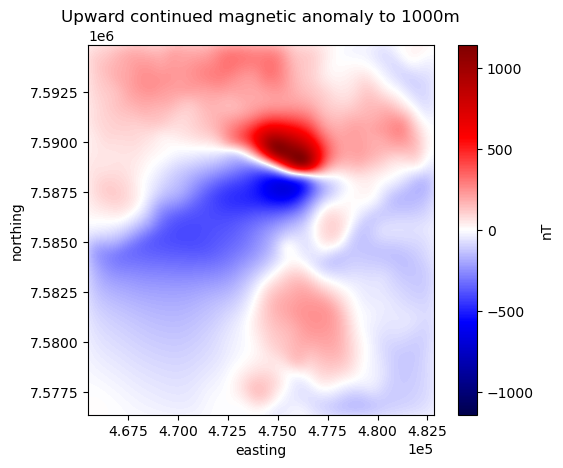

In [17]:
tmp = upward_continued.plot(cmap="seismic", center=0, add_colorbar=False)
plt.gca().set_aspect("equal")
plt.title("Upward continued magnetic anomaly to 1000m")
plt.gca().ticklabel_format(style="sci", scilimits=(0, 0))
plt.colorbar(tmp, label="nT")
plt.show()

In [18]:
inclination, declination = -52.98, 6.51

In [19]:
rtp_grid = hm.reduction_to_pole(
    magnetic_grid_padded, inclination=inclination, declination=declination
)

# Unpad the reduced to the pole grid
rtp_grid = xrft.unpad(rtp_grid, pad_width)
rtp_grid

/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/harmonica/filters/_fft.py:48: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  grid = grid.drop(bad_coords)
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:455: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  daft = daft.drop([d for d in dim if d in daft.coords])
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:671: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da = da.drop([d for d in dim if d in da.coords])


<xarray.DataArray (northing: 370, easting: 346)> Size: 1MB
array([[  14.15546834,   10.38425778,   10.01995891, ..., -219.8102288 ,
        -210.9302948 , -179.38411068],
       [  -3.21249403,   -9.37124449,  -10.96593068, ..., -165.15297526,
        -158.09589683, -133.29346492],
       [  -2.32174677,   -9.44940979,  -11.35233997, ..., -170.79739203,
        -165.2567305 , -141.04626566],
       ...,
       [  45.45701952,  -24.80999268,  -51.27393509, ...,  -40.42602057,
         -64.12371145,  -75.97556295],
       [  36.9104954 ,  -37.13717695,  -58.40650833, ...,  -34.55584156,
         -55.6561726 ,  -71.01718702],
       [-102.42450988, -155.67867833, -165.96638688, ...,  -36.95818214,
         -35.0401052 ,  -40.15055123]], shape=(370, 346))
Coordinates:
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05

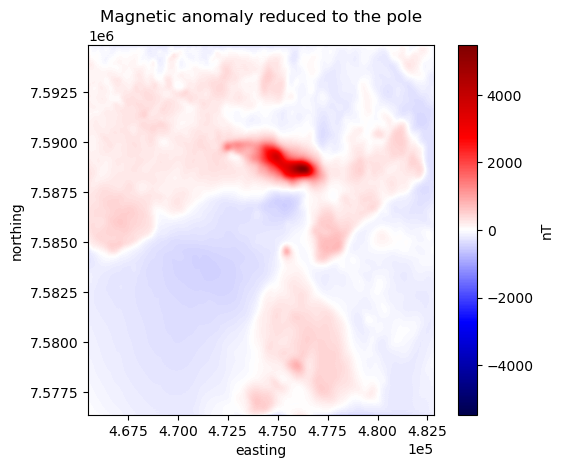

In [20]:
tmp = rtp_grid.plot(cmap="seismic", center=0, add_colorbar=False)
plt.gca().set_aspect("equal")
plt.title("Magnetic anomaly reduced to the pole")
plt.gca().ticklabel_format(style="sci", scilimits=(0, 0))
plt.colorbar(tmp, label="nT")
plt.show()

In [21]:
mag_inclination, mag_declination = -25, 21

tmp = rtp_grid = hm.reduction_to_pole(
    magnetic_grid_padded,
    inclination=inclination,
    declination=declination,
    magnetization_inclination=mag_inclination,
    magnetization_declination=mag_declination,
)

# Unpad the reduced to the pole grid
rtp_grid = xrft.unpad(rtp_grid, pad_width)
rtp_grid

/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/harmonica/filters/_fft.py:48: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  grid = grid.drop(bad_coords)
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:455: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  daft = daft.drop([d for d in dim if d in daft.coords])
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:671: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da = da.drop([d for d in dim if d in da.coords])


<xarray.DataArray (northing: 370, easting: 346)> Size: 1MB
array([[ -77.45230222, -114.40589805, -117.03964335, ...,  -87.74331941,
         -75.65311441,   43.0543142 ],
       [ -99.41773744, -137.48348629, -141.5147968 , ...,  -31.30662147,
         -20.40281657,   92.22748918],
       [ -99.90966143, -139.38038808, -143.11784398, ...,  -38.52922255,
         -29.73746893,   83.23553188],
       ...,
       [  13.25374634, -170.27669068, -163.93668068, ...,  -44.43378324,
         -80.78993325,  -66.8060264 ],
       [ -28.47757862, -187.01875868, -173.90317006, ...,  -27.82016979,
         -55.31902009,  -61.09794208],
       [-236.07958913, -301.62729697, -299.61024736, ...,  -28.01930179,
         -18.38082429,  -22.65814366]], shape=(370, 346))
Coordinates:
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05

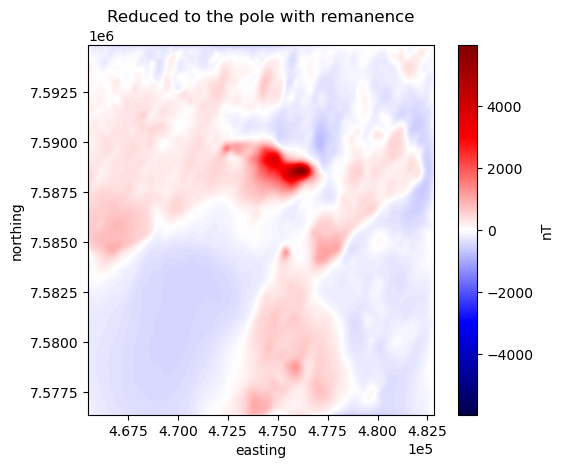

In [22]:
tmp = rtp_grid.plot(cmap="seismic", center=0, add_colorbar=False)
plt.gca().set_aspect("equal")
plt.title("Reduced to the pole with remanence")
plt.gca().ticklabel_format(style="sci", scilimits=(0, 0))
plt.colorbar(tmp, label="nT")
plt.show()

In [23]:
cutoff_wavelength = 5e3

In [24]:
magnetic_low_freqs = hm.gaussian_lowpass(
    magnetic_grid_padded, wavelength=cutoff_wavelength
)
magnetic_high_freqs = hm.gaussian_highpass(
    magnetic_grid_padded, wavelength=cutoff_wavelength
)

/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/harmonica/filters/_fft.py:48: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  grid = grid.drop(bad_coords)
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:455: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  daft = daft.drop([d for d in dim if d in daft.coords])
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:671: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da = da.drop([d for d in dim if d in da.coords])
/home/runner/miniconda3/envs/h

In [25]:
magnetic_low_freqs = xrft.unpad(magnetic_low_freqs, pad_width)
magnetic_high_freqs = xrft.unpad(magnetic_high_freqs, pad_width)

In [26]:
magnetic_low_freqs

<xarray.DataArray (northing: 370, easting: 346)> Size: 1MB
array([[ 4.60585742e+00,  4.72025807e+00,  4.81814332e+00, ...,
        -3.68551963e+01, -3.50940549e+01, -3.33406590e+01],
       [ 4.70587584e+00,  4.81991561e+00,  4.91668718e+00, ...,
        -3.87398587e+01, -3.68891989e+01, -3.50465543e+01],
       [ 4.78689168e+00,  4.89969232e+00,  4.99448397e+00, ...,
        -4.06231237e+01, -3.86830315e+01, -3.67512125e+01],
       ...,
       [ 5.24052307e+01,  5.51977692e+01,  5.80158045e+01, ...,
        -8.46624027e-01, -1.00254650e+00, -1.16000669e+00],
       [ 5.00637788e+01,  5.27307718e+01,  5.54221609e+01, ...,
         1.79766185e-01, -1.44140930e-02, -2.10519096e-01],
       [ 4.77049435e+01,  5.02456818e+01,  5.28097178e+01, ...,
         1.08696676e+00,  8.60201189e-01,  6.31169136e-01]],
      shape=(370, 346))
Coordinates:
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05

In [27]:
magnetic_high_freqs

<xarray.DataArray (northing: 370, easting: 346)> Size: 1MB
array([[ 30.39409376,  31.4796931 ,  31.88180785, ..., -64.24485251,
        -65.3059939 , -66.25938981],
       [ 31.79407534,  32.78003556,  33.08326399, ..., -63.46019009,
        -64.6108499 , -65.65349454],
       [ 32.3130595 ,  33.30025885,  33.6054672 , ..., -62.6769251 ,
        -63.91701728, -65.14883631],
       ...,
       [130.3947205 , 117.20218197, 102.78414668, ...,   1.6465752 ,
        -23.19750233, -40.64004214],
       [132.03617232, 119.86917935, 105.97779024, ...,   5.82018499,
        -21.48563474, -40.78952973],
       [131.09500767, 120.15426938, 107.49023338, ...,  10.31298441,
        -16.86025002, -36.43121796]], shape=(370, 346))
Coordinates:
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05

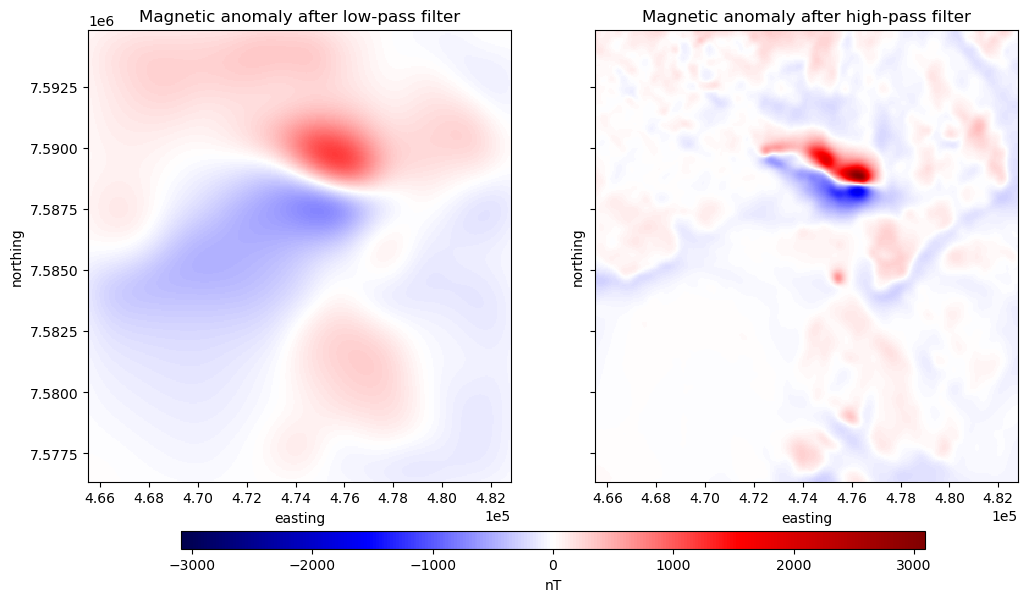

In [28]:
import verde as vd

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, sharey=True, figsize=(12, 8)
)

maxabs = vd.maxabs(magnetic_low_freqs, magnetic_high_freqs)
kwargs = dict(cmap="seismic", vmin=-maxabs, vmax=maxabs, add_colorbar=False)

tmp = magnetic_low_freqs.plot(ax=ax1, **kwargs)
tmp = magnetic_high_freqs.plot(ax=ax2, **kwargs)

ax1.set_title("Magnetic anomaly after low-pass filter")
ax2.set_title("Magnetic anomaly after high-pass filter")
for ax in (ax1, ax2):
    ax.set_aspect("equal")
    ax.ticklabel_format(style="sci", scilimits=(0, 0))

plt.colorbar(
    tmp,
    ax=[ax1, ax2],
    label="nT",
    orientation="horizontal",
    aspect=42,
    shrink=0.8,
    pad=0.08,
)
plt.show()

In [29]:
tga_grid = hm.total_gradient_amplitude(
    magnetic_grid_padded
)

# Unpad the total gradient amplitude grid
tga_grid = xrft.unpad(tga_grid, pad_width)
tga_grid

/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/harmonica/filters/_fft.py:48: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  grid = grid.drop(bad_coords)
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:455: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  daft = daft.drop([d for d in dim if d in daft.coords])
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/home/runner/miniconda3/envs/harmonica-docs/lib/python3.12/site-packages/xrft/xrft.py:671: FutureWarning: dropping variables using `drop` is deprecated; use drop_vars.
  da = da.drop([d for d in dim if d in da.coords])


<xarray.DataArray (northing: 370, easting: 346)> Size: 1MB
array([[1.08738592, 0.72940807, 0.75509218, ..., 2.0132328 , 1.95999329,
        3.07313939],
       [0.73942233, 0.22047172, 0.23189001, ..., 0.49121787, 0.46025515,
        1.96645552],
       [0.76571121, 0.23589359, 0.24513169, ..., 0.51108555, 0.49303789,
        2.03290899],
       ...,
       [3.80734867, 0.95574565, 0.87764784, ..., 0.59290377, 0.57163822,
        1.15583825],
       [3.71454961, 0.92058867, 0.87376757, ..., 0.63073088, 0.60064385,
        1.14353417],
       [5.63063027, 3.39067041, 3.24439853, ..., 0.61133653, 0.64716741,
        1.33503332]], shape=(370, 346))
Coordinates:
  * northing  (northing) float64 3kB 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06
  * easting   (easting) float64 3kB 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05

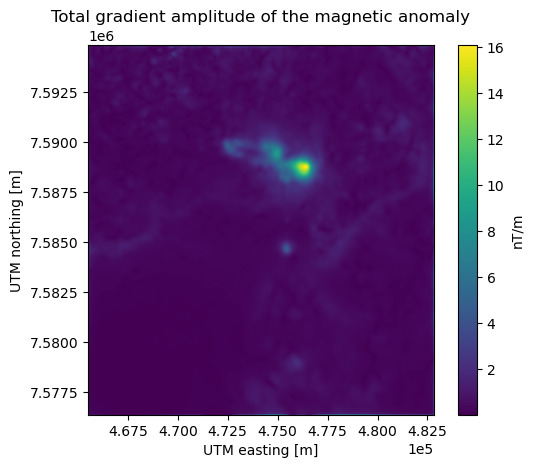

In [30]:
import verde as vd

tmp = tga_grid.plot(cmap="viridis", add_colorbar=False)
plt.gca().set_aspect("equal")
plt.title("Total gradient amplitude of the magnetic anomaly")
plt.gca().ticklabel_format(style="sci", scilimits=(0, 0))
plt.colorbar(tmp, label="nT/m")
plt.show()